In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import SHFunctions as shf
import os

    A = shf.MakeStochA(4,6)

In [2]:
    A = shf.MakeSingularA(3, 2, delta = .00010)

    A = np.array([[[0, 1/3, 1/3],
                   [1/3, 0, 1/3],
                   [1/3, 1/3, 0]],
                  [[-2, 1/3, 1/3],
                   [1/3, -2, 1/3],
                   [1/3, 1/3, -2]],
                  [[0, 1/3, 1/3],
                   [1/3, 0, 1/3],
                   [1/3, 1/3, 0]]])

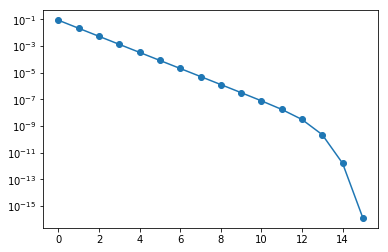

In [3]:
    Ss = shf.NewtonPoly(A)
    ax = plt.subplot(111)
    ax.semilogy(Ss['errs'],'-o')

In [4]:
    di = np.zeros((len(Ss['P_Xs']), Ss['P_Xs'][0].shape[0]))
    di = di.astype(complex)
    i = 0
    for P in Ss['P_Xs']:
        d, X = nla.eig(P)
        di[i, :] = d
        i += 1
    print(di.dtype)

complex128


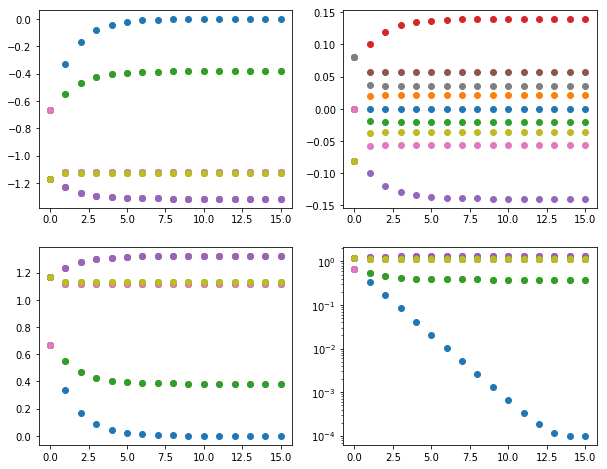

In [5]:
    fig, axes = plt.subplots(2, 2,figsize=(10, 8))
    for i in range(di.shape[1]):
        axes[0,0].plot(np.real(di[:,i]),'o')
        axes[0,1].plot(np.imag(di[:,i]),'o')
        axes[1,0].plot(np.absolute(di[:,i]),'o')
        axes[1,1].semilogy(np.absolute(di[:,i]),'o')
        i += 1

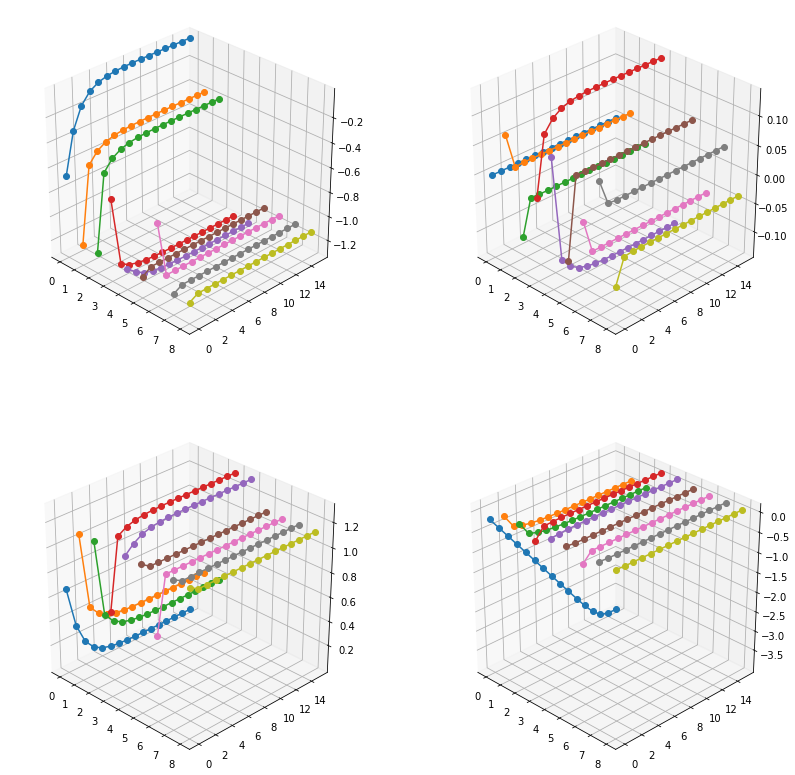

In [6]:
    fig1 = plt.figure(figsize=(14,14))
    ax1 = fig1.add_subplot(221, projection='3d')
    ax2 = fig1.add_subplot(222, projection='3d')
    ax3 = fig1.add_subplot(223, projection='3d')
    ax4 = fig1.add_subplot(224, projection='3d')
    for i in range(di.shape[1]):
        ax1.plot(i*np.ones(di.shape[0]), np.arange(di.shape[0]), np.real(di[:,i]),'-o')
        ax2.plot(i*np.ones(di.shape[0]), np.arange(di.shape[0]), np.imag(di[:,i]),'-o')
        ax3.plot(i*np.ones(di.shape[0]), np.arange(di.shape[0]), np.absolute(di[:,i]),'-o')
        ax4.plot(i*np.ones(di.shape[0]), np.arange(di.shape[0]), np.log10(np.absolute(di[:,i])),'-o')
        i += 1
    ax1.view_init(30, 315)
    ax2.view_init(30, 315)
    ax3.view_init(30, 315)
    ax4.view_init(30, 315)

    di = []
    for P in Ss['P_Xs']:
        d, X = nla.eig(P)
        di.append(d)
    fig, axes = plt.subplots(1,2,figsize=(10, 4))
    i = 0
    for d in di:
        axes[0].plot(i*np.ones(d.shape[0]), np.real(d),'o')
        axes[1].plot(i*np.ones(d.shape[0]), np.imag(d),'o')
        i += 1
    print(len(di))

In [7]:
    Ss['Hs'][0]

array([[-0.05864734, -0.1308959 , -0.31038176],
       [-0.21087622, -0.06202969, -0.22701909],
       [-0.16832067, -0.24629887, -0.08530546]])

In [8]:
    Ss['Hs'][-2]

array([[-6.55178932e-07, -6.81633513e-07, -8.63681936e-07],
       [-6.55178932e-07, -6.81633513e-07, -8.63681936e-07],
       [-6.55178932e-07, -6.81633513e-07, -8.63681936e-07]])

In [9]:
    Ss['Hs'][-1]

array([[-4.80614642e-09, -5.00020740e-09, -6.33564618e-09],
       [-4.80614642e-09, -5.00020734e-09, -6.33564608e-09],
       [-4.80614642e-09, -5.00020734e-09, -6.33564619e-09]])

In [10]:
    Ss['Hs'][-1]/Ss['Hs'][-2]

array([[0.00733562, 0.00733562, 0.00733562],
       [0.00733562, 0.00733562, 0.00733562],
       [0.00733562, 0.00733562, 0.00733562]])

    d, X = nla.eig(Ss['sol'])
    print(d)
    print(X)

    # S - X_{i}와 X_{i+1} - X_{i}의 Frobenius norm 구하기
    nSmX = []
    for X in Ss['Xs']:
        nSmX.append(nla.norm(Ss['sol'] - X,'fro'))

    nXmX = []
    for i in range(len(Ss['Xs'])-1):
        nXmX.append(nla.norm(Ss['Xs'][i+1] - Ss['Xs'][i],'fro'))

    # 그래프로 S - X_{i}와 X_{i+1} - X_{i} 비교
    dXoverdX = [nXmX[i+1] / nXmX[i] for i in range(len(nXmX)-1)]
    dSoverdS = [nSmX[i+1] / nSmX[i] for i in range(len(nSmX)-1)]
    fig, axes = plt.subplots(2,2,figsize=(10, 8))
    axes[0,0].semilogy(nSmX,'-ob')
    axes[0,1].semilogy(nSmX,'-ob')
    axes[0,1].semilogy(nXmX,'-or')
    axes[1,0].plot(dSoverdS,'-ob')
    axes[1,1].plot(dSoverdS,'-ob')
    axes[1,1].plot(dXoverdX, '-or')